In [1]:
#setup working directory
import os
os.chdir("C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug\\DT")

In [2]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug\\DT'

In [3]:
import numpy as np # array and maths
import pandas as pd # import and export / manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # adv visualisation + Stats
%matplotlib inline

In [4]:
# import dataset
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [14]:
# check1 - missing value
df.isnull().any()

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool

<AxesSubplot:ylabel='Age'>

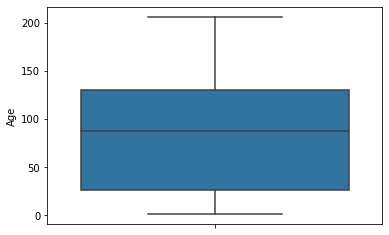

In [15]:
# check 2 - outlier 
# since it's classification problem
sns.boxplot(y='Age', data=df)

<AxesSubplot:ylabel='Number'>

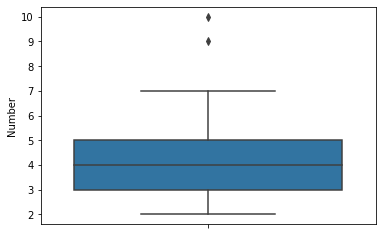

In [16]:
sns.boxplot(y='Number', data=df)

In [17]:
# check 3 - label encoder 
df.columns
# Kyphosis - dependent variable
# Age / Number / Start - Independent variable
# since independent variables are number so no need to handle encoding part

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [19]:
# Kyphosis - number
df['Kyphosis'] = df['Kyphosis'].astype('category')
df['Kyphosis'] = df['Kyphosis'].cat.codes
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [10]:
# split the data into ind variable and dependent variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
# check 4 - feature scaling 
from sklearn.preprocessing import StandardScaler
sc_df = StandardScaler()
x_sc = sc_df.fit_transform(x)

In [22]:
x_sc

array([[-0.21914343, -0.65203532, -1.33790708],
       [ 1.28749437, -0.65203532,  0.51634056],
       [ 0.7679641 , -0.03068401, -1.33790708],
       [-1.41406306,  0.59066729, -2.16201714],
       [-1.43138074, -0.03068401,  0.72236808],
       [-1.43138074, -1.27338662,  0.92839559],
       [-0.39232019, -1.27338662,  1.13442311],
       [-0.80794441, -0.65203532,  0.92839559],
       [ 0.50819896, -1.27338662,  0.92839559],
       [-0.42695554,  1.21201859,  0.10428553],
       [-0.02864899,  0.59066729,  0.51634056],
       [ 1.11431761, -0.65203532,  0.92839559],
       [-1.13698025,  0.59066729, -1.95598962],
       [-1.43138074, -0.03068401,  0.10428553],
       [ 1.46067113, -0.65203532,  1.34045062],
       [-1.43138074, -0.65203532,  0.92839559],
       [-0.0979197 ,  1.21201859,  0.72236808],
       [ 1.58189486,  0.59066729,  0.31031305],
       [-0.06328435,  0.59066729,  0.92839559],
       [-0.98112117, -0.03068401, -0.51379701],
       [-1.06770955, -1.27338662,  0.928

In [11]:
print(x)
print(y)

    Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]
0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object


In [23]:
# check 5 : imbalanced dataset - found
# we have to treat this
df['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [ ]:
!pip install imblearn

In [24]:
import imblearn

In [25]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x_sc,y)

In [26]:
print(x_over.shape)
print(y_over.shape)

(128, 3)
(128,)


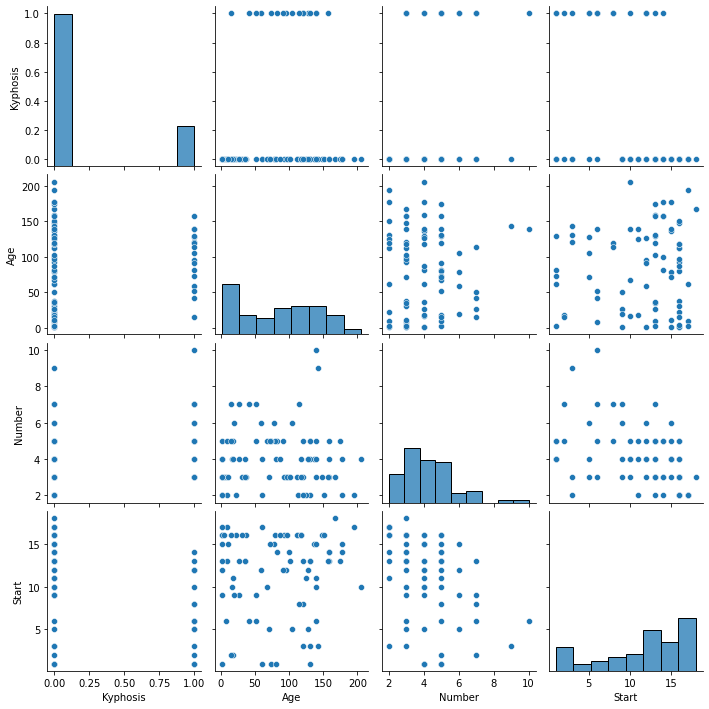

In [27]:
# EDA 
sns.pairplot(df)

In [29]:
# correlation between dv and idv
df.corr()

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


<AxesSubplot:>

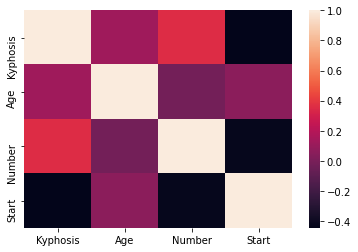

In [32]:
sns.heatmap(df.corr())

In [33]:
# split the data into training and test
# 2.7 or any version - plesae use cross_validation instead of model_selection

from sklearn.model_selection import train_test_split
x_sc_train, x_sc_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=100)

In [34]:
print(x_sc_train.shape)
print(x_sc_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 3)
(21, 3)
(60,)
(21,)


In [36]:
# Model Building 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_sc_train, y_train)

DecisionTreeClassifier()

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_sc_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
dt1_pred_test = dt.predict(x_sc_test)
dt1_pred_train = dt.predict(x_sc_train)

In [38]:
print(y_train)
print(dt_pred_train)

55     absent
50     absent
28     absent
43     absent
32     absent
37    present
54     absent
21    present
33     absent
35     absent
78     absent
80     absent
17     absent
76    present
40    present
0      absent
18     absent
42     absent
57    present
71     absent
56     absent
30     absent
41     absent
64     absent
73     absent
51     absent
72     absent
59     absent
47     absent
49     absent
7      absent
3      absent
63     absent
61    present
36     absent
19     absent
74     absent
13     absent
1      absent
31     absent
4      absent
44     absent
27     absent
2     present
9     present
16     absent
58     absent
60    present
15     absent
79    present
34     absent
14     absent
66     absent
53     absent
52    present
10    present
48    present
67     absent
24    present
8      absent
Name: Kyphosis, dtype: object
['absent' 'absent' 'absent' 'absent' 'absent' 'present' 'absent' 'present'
 'absent' 'absent' 'absent' 'absent' 'absent' 'present'

In [39]:
print(dt_pred_test)
print(y_test)

['absent' 'absent' 'absent' 'absent' 'present' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'present' 'absent']
11     absent
77     absent
25     absent
5      absent
62     absent
70     absent
20     absent
22    present
23     absent
65     absent
69     absent
45    present
46     absent
26     absent
39    present
29     absent
6      absent
75     absent
38     absent
12     absent
68     absent
Name: Kyphosis, dtype: object


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
confusion_matrix(y_test, dt_pred_test)

array([[15,  3],
       [ 3,  0]], dtype=int64)

In [43]:
(15+0)/(15+3+3+0)

0.7142857142857143

In [57]:
# test dataset
print(accuracy_score(y_test, dt1_pred_test))
print(accuracy_score(y_train, dt1_pred_train))

0.7142857142857143
1.0


In [45]:
# training dataset
accuracy_score(y_train, dt1_pred_train)

1.0

In [ ]:
# High Variance (Overfitting problem)- variance between train and test would be more than 15%
# High Bias (Underfit problem) - both training and test result less than threshold value (70%)

In [ ]:
# we have overfitting problem in this model
# Sol - we have to build RandomForest and apply cross validation method

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_sc_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [48]:
y_rf_train = rf.predict(x_sc_train)
y_rf_test = rf.predict(x_sc_test)

In [49]:
print(accuracy_score(y_train, y_rf_train))
print(accuracy_score(y_test, y_rf_test))

1.0
0.8095238095238095


In [51]:
# cross validation (k-fold method) - to improve your accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = rf, X= x_sc_train, y = y_train, cv=10)
accuracy

array([0.83333333, 1.        , 0.5       , 0.83333333, 1.        ,
       0.83333333, 0.83333333, 0.83333333, 0.66666667, 0.66666667])

In [52]:
accuracy[1]

1.0

In [54]:
# cross validation (k-fold method) - to improve your accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = rf, X= x_sc_train, y = y_train, cv=15)
accuracy.mean()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 14 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


0.7833333333333333

In [58]:
from sklearn.linear_model import LinearRegression
LinearRegression()

In [59]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression()